In [58]:
import pandas as pd

In [59]:
df = pd.read_csv("ad_spend.csv")
df.sample(5)

,Ad Spend ($),Season,Revenue ($)
86,672,Monsoon,670
197,184,Monsoon,10
116,536,Winter,715
88,630,Summer,523
119,859,Summer,1052


In [60]:
df.shape

(200, 3)

In [61]:
g = df.groupby("Season")[["Ad Spend ($)","Revenue ($)"]].mean()
g

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


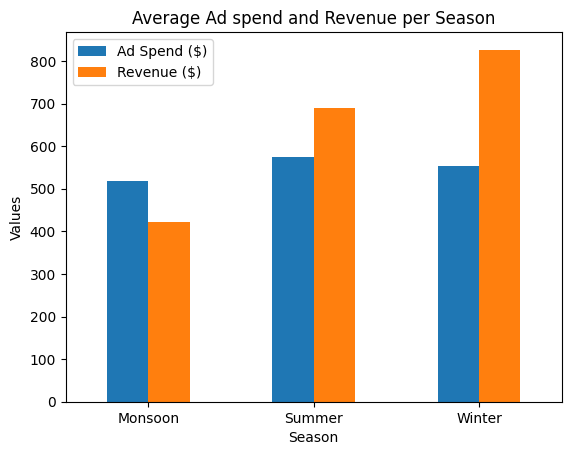

In [62]:
from matplotlib import pyplot as plt
ax = g.plot(kind='bar')
ax.set_title("Average Ad spend and Revenue per Season")
ax.set_xlabel("Season")
ax.set_ylabel("Values")
plt.xticks(rotation=360)
plt.show()

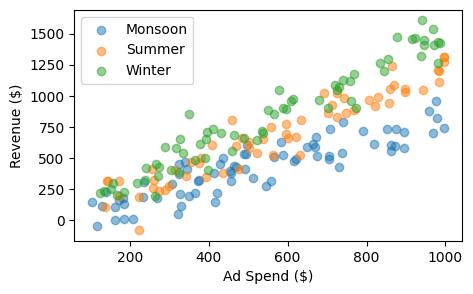

In [63]:
plt.figure(figsize=(5, 3))
for season, subdf in df.groupby("Season"):
    plt.scatter(subdf["Ad Spend ($)"], subdf["Revenue ($)"], alpha = 0.5, label = season)
plt.xlabel("Ad Spend ($)")
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

#### Applying One Hot Encoding for the Categorical column Season in our dataFrame

In [64]:
df_encoded = pd.get_dummies(df, columns=["Season"], drop_first= True)
df_encoded.head()

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True


#### Train_Test_Split 

In [65]:
from sklearn.model_selection import train_test_split

X = df_encoded[['Ad Spend ($)','Season_Summer','Season_Winter']]
y = df_encoded['Revenue ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state= 10)

#### Linear Regression Model

In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8823172485530336

#### Decision Tree Regresion Model

In [67]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9163405765229717

#### Gradient Boosting Model

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9261691125344311

In [69]:
y_pred = model.predict(X_test)

df_eval = pd.DataFrame({'Actual':y_test, 'Prediction':y_pred})
df_eval.head()

,Actual,Prediction
59,605,668.066269
5,1125,1052.139051
20,699,637.091195
198,504,434.483700
52,1310,1251.627118


In [70]:
df_eval['Diff(%)']= abs((df_eval['Prediction']-df_eval['Actual'])*100/df_eval['Actual'])
df_eval.head()

,Actual,Prediction,Diff(%)
59,605,668.066269,10.424177
5,1125,1052.139051,6.476529
20,699,637.091195,8.856767
198,504,434.483700,13.792917
52,1310,1251.627118,4.455945
